In [1]:
import os
import platform

#########################################################################################################################################################
# PARAMETROS DEFINIDOS EN FUNCION DEL USUARIO
#########################################################################################################################################################

# Ruta relativa hacia la librería ai4eutils
ai4eutils_relative = "./repos/ai4eutils"

# Ruta relativa hacia la librería CameraTraps
CameraTraps_relative = "./repos/CameraTraps"

# Ruta relativa hacia carpeta de JSON con los datos de entrada
output_json_path_relative = './output_json'

# Ruta relativa hacia la carpeta destino de los ficheros JSON:
output_crop_path_relative = ('./output_crop')


#########################################################################################################################################################
#########################################################################################################################################################

home = os.path.expanduser("~")

ai4utils = os.path.abspath(ai4eutils_relative)
CameraTraps = os.path.abspath(CameraTraps_relative)
output_json = os.path.abspath(output_json_path_relative)
output_crop = os.path.abspath(output_crop_path_relative)

try:
    os.environ['PYTHONPATH']
except KeyError:
    os.environ['PYTHONPATH'] = ""
if platform.system() == 'Windows':
    os.environ['PYTHONPATH'] += (";" + ai4utils)
    os.environ['PYTHONPATH'] += (";" + CameraTraps)
else:
    os.environ['PYTHONPATH'] += (":" + ai4utils)
    os.environ['PYTHONPATH'] += (":" + CameraTraps)

print('=======================================================================================================================================')
print('PYTHONPATH: ' + os.environ['PYTHONPATH'])
print('ai4eutils PATH: ' + '\t' + ai4utils)
print('CameraTraps PATH: ' + '\t' + CameraTraps)
print('output_json PATH: ' + '\t' + output_json)
print('output_crop PATH: ' + '\t' + output_crop)
print('=======================================================================================================================================')

PYTHONPATH: /home/carlos/.vscode/extensions/ms-toolsai.jupyter-2022.5.1001601848/pythonFiles:/home/carlos/.vscode/extensions/ms-toolsai.jupyter-2022.5.1001601848/pythonFiles/lib/python:/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/ai4eutils:/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/CameraTraps
ai4eutils PATH: 	/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/ai4eutils
CameraTraps PATH: 	/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/CameraTraps
output_json PATH: 	/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_json
output_crop PATH: 	/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop


In [2]:
!python ./modules/genera_recortes.py --input_dir "$output_json" --output_dir "$output_crop"

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 101.17it/s]


  0%|          | 0/13 [00:00<?, ?it/s]

/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/4_crop00_.jpg


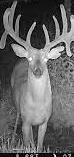


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/10_crop00_.jpg


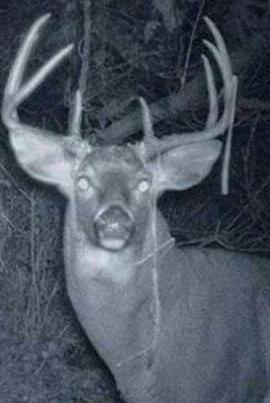


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/5_crop00_.jpg


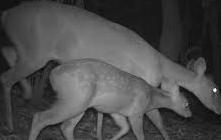


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/5_crop01_.jpg


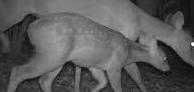


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/9_crop00_.jpg


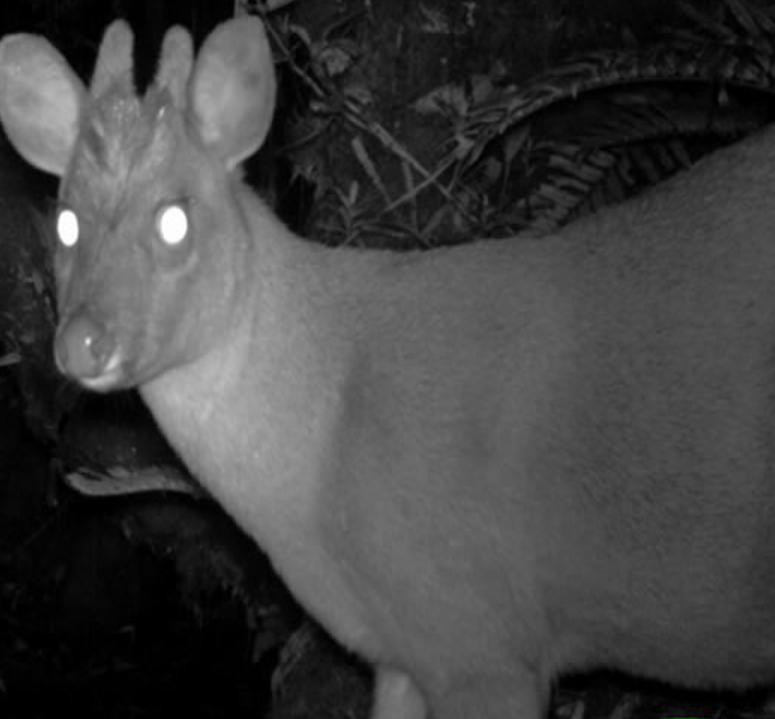

 38%|███▊      | 5/13 [00:00<00:00, 30.57it/s]


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/7_crop00_.jpg


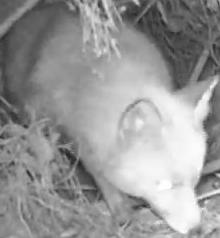


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/10_crop01_.jpg


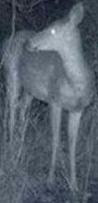


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/2_crop00_.jpg


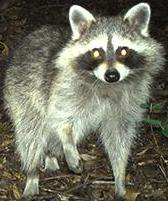


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/6_crop00_.jpg


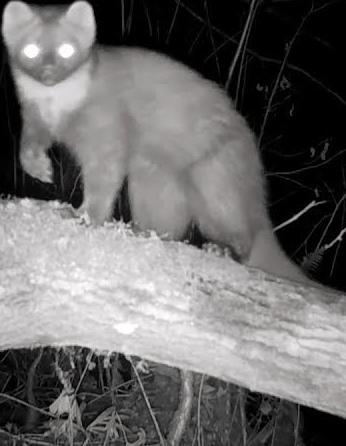


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/10_crop02_.jpg


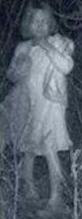


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/1_crop00_.jpg


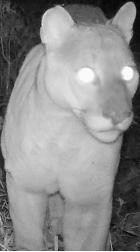


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/8_crop00_.jpg


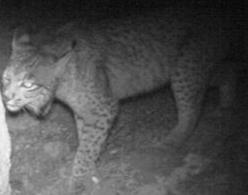

 92%|█████████▏| 12/13 [00:00<00:00, 45.61it/s]


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_crop/3_crop00_.jpg


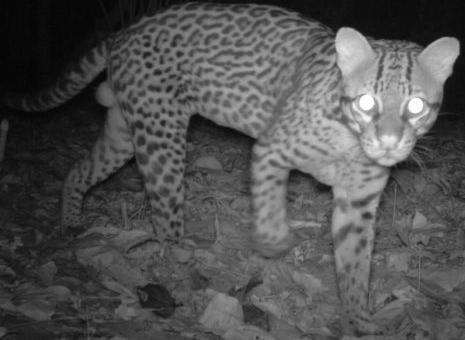

100%|██████████| 13/13 [00:00<00:00, 38.21it/s]

In [3]:
import os
import glob
from PIL import Image
from tqdm import tqdm

image_extensions = ['.jpg', '.jpeg', '.gif', '.png']

def is_image_file(s):
    """
    Compara la extesión de un archivo con las extensiones admitadas en 
    image_extensions.
    """
    ext = os.path.splitext(s)[1]
    return ext.lower() in image_extensions

def find_image_files(strings):
    """
    Devuelve una lista de nombres candidatos a ser ficheros de imágenes. Para los 
    nombres busca a partir de las extensiones incluidas en image_extension.
    """
    return [s for s in strings if is_image_file(s)]

def find_images(dir_name):
    """
    Busca todos los ficheros que parecen imagénes dentro de un directorio.
    """
    strings = glob.glob(os.path.join(dir_name, '*.*'))

    image_strings = find_image_files(strings)

    return image_strings

image_file_names = find_images(output_crop)

for image_file in tqdm(image_file_names):
  print(image_file)
  im = Image.open(image_file)
  display(im)
  print('')